<a href="https://colab.research.google.com/github/badm4830/wk1-prereqs/blob/main/Covid_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Metrics


You predict six people will get coronavirus.

In [1]:
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

By the end of season, you find only five people had coronavirus.

In [2]:
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


We create a confusion matrix.

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()


Disply the confusion matrix (here is the confusion matrix: TP = 5, TN = 4, FP = 1, FN = 0).

In [4]:
# You can make the confusion matrix less confusing by adding labels:
print('Here is our confusion matrix.')

import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=[1, 0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(cmtx)

Here is our confusion matrix.
        pred:1  pred:0
true:1       5       0
true:0       1       4


In [5]:

# Print a classification report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



We calculate the percentage of sick people who are correctly identified as having the condition (also called sensitivity).

In [6]:

sensitivity = tp / (tp+fn)
print('The percentage of sick people who are correctly identified as having the condition')
print('Sensitivity : %7.3f %%' % (sensitivity*100),'\n')

The percentage of sick people who are correctly identified as having the condition
Sensitivity : 100.000 % 




We also the percentage of healthy people who are correctly identified as not having the condition (also called specificity).

In [7]:

specificity = tn / (tn+fp)
print('The percentage of healthy people who are correctly identified as not having the condition')
print('Specificity : %7.3f %%' % (specificity*100))

The percentage of healthy people who are correctly identified as not having the condition
Specificity :  80.000 %


Next, we calculate the precision of this algorithm.

In [8]:

from sklearn.metrics import precision_score
print('The ratio of properly predicted positive clarifications to the total predicted positive clarifications.')
print(precision_score(y_true, y_pred, average=None))

The ratio of properly predicted positive clarifications to the total predicted positive clarifications.
[1.         0.83333333]


The our algorithm can 100% predict ‘no-coronavirus’ but only 80% ‘coronavirus’ cases correctly.

We calculate the probability that records with a negative predicted result truly should be negative (called NPV metric).

In [9]:

npv = tn / (tn+fn)
print('The probability that records with a negative predicted result truly should be negative: %7.3f %%' % (npv*100))

The probability that records with a negative predicted result truly should be negative: 100.000 %


It shows that NPV = 100%, very good.

We calculate the proportion of positives that yield negative prediction outcomes with the specific model (also called miss rate or FNR).

In [10]:

fnr = fp / (fn+tp)
print('The proportion of positives that yield negative prediction outcomes with the specific model: %7.3f %%' % (fnr*100))

The proportion of positives that yield negative prediction outcomes with the specific model:  20.000 %


It shows that 20% of the predicted positives are negative. It means 1 in 5 predicted negative outputs are positive. Not good, you will miss 1 in 5 patients.

Finally, we calculate the false positive rate (also called FPR).

In [11]:
fdr = fp / (fp+tp)
print('False discovery rate: %7.3f %%' % (fdr*100))

False discovery rate:  16.667 %


We calculate statistical bias, as these cause a difference between a result and a "true" value.

In [12]:
acc = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy: %7.3f %%' % (acc*100))

Accuracy:  90.000 %



This will be reported as 90% accuracy. This is a good outcome for our coronavirus model.

Finally, we will calculate the ROC metric. Let assume score variable which stores the probability of your prediction as a value of random.

In [13]:
import numpy as np

In [15]:
n0, n1 = 5, 5
score0 = np.random.rand(n0)/2
label0 = np.zeros(n0, dtype = int)
score1  = np.random.rand(n1)/2 + .2
label1 = np.ones(n1, dtype = int)
scores = np.concatenate((score0, score1))

print('True labels:')
print(y_true)
print('\nScores:')
print(scores)

True labels:
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

Scores:
[0.36136117 0.14978822 0.31375401 0.31316861 0.36092322 0.68696405
 0.61202774 0.35152114 0.49335508 0.22429071]


In [16]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, scores, pos_label = 1)
print('Thresholds:')
print(thresholds)

Thresholds:
[1.68696405 0.68696405 0.49335508 0.36092322 0.35152114 0.31316861
 0.22429071 0.14978822]


In [17]:

print('False Positive Rate:')
print(fpr)

False Positive Rate:
[0.  0.  0.  0.4 0.4 0.8 0.8 1. ]


In [18]:
print('True Positive Rate:')
tpr

True Positive Rate:


array([0. , 0.2, 0.6, 0.6, 0.8, 0.8, 1. , 1. ])

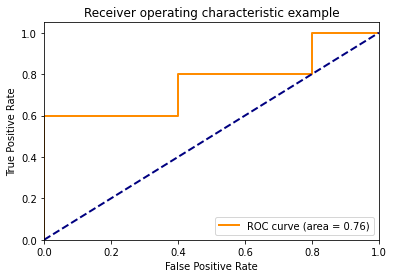

In [19]:

import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

it shows that TPR is approximately equal to FPR. In some case, TPR is higher than FPR, it is good.